In [34]:
import pandas as pd
import numpy as np
import xgboost as xgb

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib import pyplot

In [36]:
x_train = pd.read_csv("adult_train2.csv")
x_test = pd.read_csv("adult_test2.csv")

# 刪除特徵前

In [37]:
x_train
x_train_feature = x_train.drop(labels=['Class'],axis=1)
y_train_class = x_train['Class'].values

In [38]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(x_train_feature)
x_scaled = scaler.transform(x_train_feature)
x_train_final=pd.DataFrame(x_scaled,columns=x_train_feature.columns)
x_train_final

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,0.833333,0.043338,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.419355,0.95
1,0.452055,0.666667,0.047277,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.129032,0.95
2,0.287671,0.333333,0.137244,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.419355,0.95
3,0.493151,0.333333,0.150212,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.419355,0.95
4,0.150685,0.333333,0.220703,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.419355,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.136986,0.333333,0.165563,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.397849,0.95
30158,0.315068,0.333333,0.095589,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.419355,0.95
30159,0.561644,0.333333,0.093914,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.419355,0.95
30160,0.068493,0.333333,0.127620,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.204301,0.95


In [39]:
x_test
x_test_feature = x_test.drop(labels=['Class'],axis=1)
x_test_class = x_test['Class'].values

In [40]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(x_test_feature)
x_scaled = scaler.transform(x_test_feature)
x_test_final=pd.DataFrame(x_scaled,columns=x_test_feature.columns)
x_test_final

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.109589,0.333333,0.144430,0.066667,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.443182,0.948718
1,0.287671,0.333333,0.051677,0.733333,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.556818,0.948718
2,0.150685,0.166667,0.219011,0.466667,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.443182,0.948718
3,0.369863,0.333333,0.099418,1.000000,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.443182,0.948718
4,0.232877,0.333333,0.125398,0.000000,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.329545,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.156895,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.443182,0.948718
15056,0.301370,0.333333,0.136723,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.397727,0.948718
15057,0.287671,0.333333,0.244762,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.556818,0.948718
15058,0.369863,0.333333,0.047666,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.443182,0.948718


In [10]:
xgboost = xgb.XGBRegressor(max_depth=20, eta = 0.3,subsample=1,colsample_bytree=1,objective='reg:linear',alpha = 10)
xgboost.fit(x_train_final, y_train_class)
y_predicted = xgboost.predict(x_test_final)
#eta(一般默認為0.3,減少每一步的權重提高模型robust)
#alpha (默認1,可應用在高維度的情況下，讓計算速度更快)
#colsample控制每棵隨機采樣的列數的占比(每一列是一個特征),0~1
#max_depth樹的最大深度
#subsample訓練模型的樣本佔整個樣本的比例，0~1
#objective學習目標 本次使用線性回歸

[12:53:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
print('特徵重要性: ',xgboost.feature_importances_)

特徵重要性:  [0.02179184 0.01111621 0.0078208  0.0084699  0.12536158 0.00860685
 0.02076242 0.5857449  0.0067268  0.03528341 0.12193289 0.02725507
 0.01322399 0.00590327]


<AxesSubplot:>

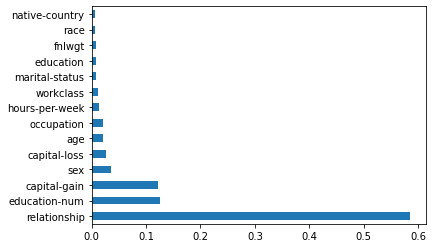

In [12]:
(pd.Series(xgboost.feature_importances_, index=x_test_final.columns)
   .nlargest(14)
   .plot(kind='barh')) 

In [13]:
print('MAE:',mean_absolute_error(x_test_class,y_predicted))

MAE: 0.2023631242760624


In [14]:
print('MAPE',mean_absolute_percentage_error(x_test_class,y_predicted))

MAPE 0.14725206648686018


In [15]:
print('RMSE:',mean_squared_error(x_test_class,y_predicted,squared=False ))

RMSE: 0.3124119359730726


# 刪除重要特徵

In [27]:
x_train
x_train_feature2 = x_train_final.drop(labels=['relationship','capital-gain','education-num'],axis=1)
y_train_class2 = x_train['Class'].values

In [28]:
x_test
x_test_feature2 = x_test_final.drop(labels=['relationship','capital-gain','education-num'],axis=1)
x_test_class2 = x_test['Class'].values

In [29]:
xgboost = xgb.XGBRegressor(max_depth=20, eta = 0.3,subsample=1,colsample_bytree=1,objective='reg:linear',alpha = 10)
xgboost.fit(x_train_feature2, y_train_class2)
y_predicted = xgboost.predict(x_test_feature2)

[12:58:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


<AxesSubplot:>

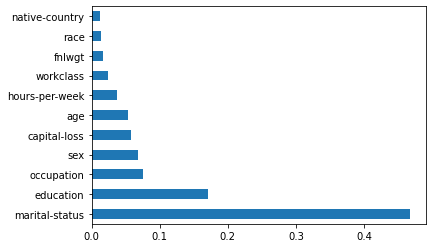

In [30]:
(pd.Series(xgboost.feature_importances_, index=x_train_feature2.columns)
   .nlargest(14)
   .plot(kind='barh')) 

In [31]:
print('MAE:',mean_absolute_error(x_test_class,y_predicted))

MAE: 0.2352988078101856


In [32]:
print('MAPE',mean_absolute_percentage_error(x_test_class,y_predicted))

MAPE 0.17070867692331868


In [33]:
print('RMSE:',mean_squared_error(x_test_class,y_predicted,squared=False ))

RMSE: 0.3390261231100194


# 刪除不重要特徵

In [41]:
x_train
x_train_feature3 = x_train_final.drop(labels=['native-country','race','fnlwgt'],axis=1)
y_train_class3 = x_train['Class'].values

x_test_feature3 = x_test_final.drop(labels=['native-country','race','fnlwgt'],axis=1)
x_test_class3 = x_test['Class'].values

In [42]:
xgboost = xgb.XGBRegressor(max_depth=20, eta = 0.3,subsample=1,colsample_bytree=1,objective='reg:linear',alpha = 10)
xgboost.fit(x_train_feature3, y_train_class3)
y_predicted = xgboost.predict(x_test_feature3)

[14:24:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [43]:
print('MAE:',mean_absolute_error(x_test_class,y_predicted))
print('MAPE',mean_absolute_percentage_error(x_test_class,y_predicted))
print('RMSE:',mean_squared_error(x_test_class,y_predicted,squared=False ))

MAE: 0.20391488299664273
MAPE 0.14727286469057738
RMSE: 0.31171509182899376
